In [348]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn import preprocessing

import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)

In [349]:
movies_dataframe = pd.read_csv('movie_metadata_usa.csv')
movies_dataframe.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,35,91,32,130512915,60884,3244,2,85,English,USA,PG,45000000,1994,4.8,1.33,0
1,Color,228,86,17,17683670,47227,1520,0,323,English,USA,PG-13,5000000,2011,5.2,1.33,0
2,Color,149,91,17,41867960,65512,3023,0,478,English,USA,R,20000000,2001,5.5,1.33,0
3,Black and White,360,81,19,140530114,186786,399,0,3400,English,USA,R,60000,1999,6.4,1.33,0
4,Color,124,90,63,217350219,260939,52970,0,244,English,USA,G,28000000,1992,8.0,1.33,0


<dl>
    <dt><h3>Movie Info</h3></dt>
    <dd><em>IMDB Score, Budget, Duration, Title Year</em></dd>
</dl>

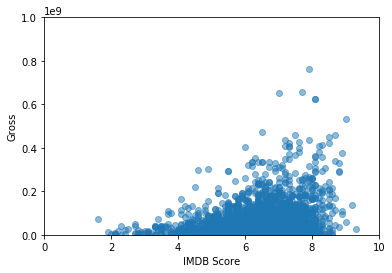

In [350]:
# Gross vs. IMDB Score

x_axis = movies_dataframe['imdb_score']
y_axis = movies_dataframe['gross']

%matplotlib inline
plt.ylabel('Gross')
plt.xlabel('IMDB Score')

plt.ylim([0, 1000000000])           #Gross limit of $1B
plt.xlim([0, 10])                   #IMDB score range from 0 - 10
plt.scatter(x_axis, y_axis, alpha=0.5)
plt.show()

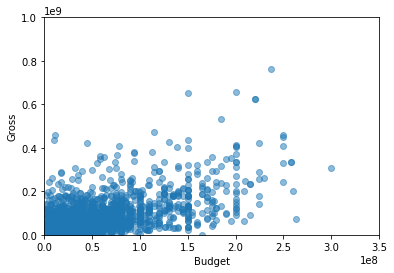

In [351]:
# Gross vs. Budget

x_axis = movies_dataframe['budget']

plt.ylabel('Gross')
plt.xlabel('Budget')

plt.ylim([0, 1000000000])           #Gross limit of $1B
plt.xlim([0, 350000000])            #Budget limit of $350M
plt.scatter(x_axis, y_axis, alpha=0.5)
plt.show()

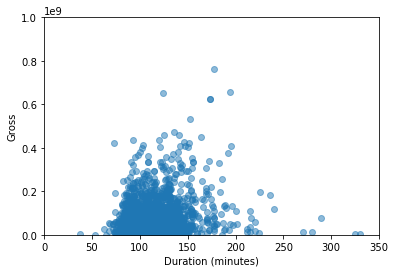

In [352]:
# Gross vs. Duration

x_axis = movies_dataframe['duration']

plt.ylabel('Gross')
plt.xlabel('Duration (minutes)')

plt.ylim([0, 1000000000])           #Gross limit of $1B
plt.xlim([0, 350])                  #Durtaion limit of 350 minutes (looong movies)
plt.scatter(x_axis, y_axis, alpha=0.5)
plt.show()

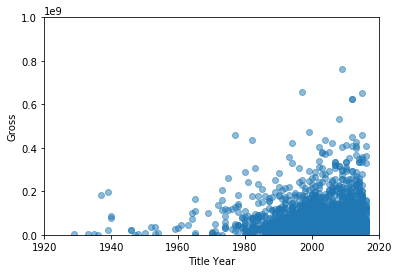

In [353]:
# Gross vs. Title Year

x_axis = movies_dataframe['title_year']

plt.ylabel('Gross')
plt.xlabel('Title Year')

plt.ylim([0, 1000000000])           #Gross limit of $1B
plt.xlim([1920, 2020])              #Title Year range of 1920 - 2020
plt.scatter(x_axis, y_axis, alpha=0.5)
plt.show()

<dl>
    <dt><h3>Ratings Info</h3></dt>
    <dd><em>Number of Critic Reviews, User Reviews, Voted Users</em></dd>
</dl>

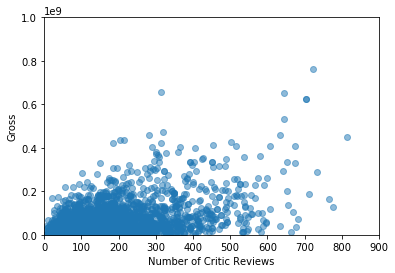

In [354]:
# Gross vs. Number of Critic Reviews

x_axis = movies_dataframe['num_critic_for_reviews']

plt.ylabel('Gross')
plt.xlabel('Number of Critic Reviews')

plt.ylim([0, 1000000000])           #Gross limit of $1B
plt.xlim([0, 900])                  #Number of Critic Reviews limit of 900
plt.scatter(x_axis, y_axis, alpha=0.5)
plt.show()

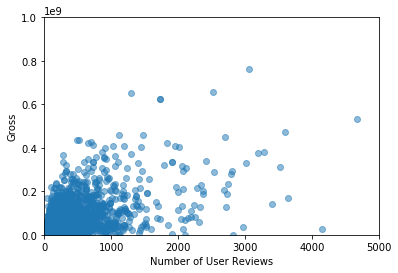

In [355]:
# Gross vs. Number of User Reviews

x_axis = movies_dataframe['num_user_for_reviews']

plt.ylabel('Gross')
plt.xlabel('Number of User Reviews')

plt.ylim([0, 1000000000])           #Gross limit of $1B
plt.xlim([0, 5000])                 #Number of User Reviews limit of 5000
plt.scatter(x_axis, y_axis, alpha=0.5)
plt.show()

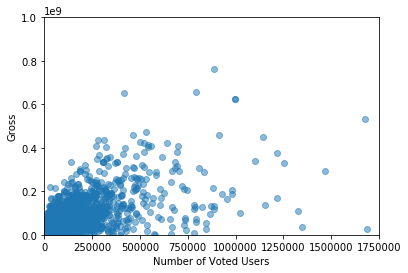

In [356]:
# Gross vs. Number of Voted Users

x_axis = movies_dataframe['num_voted_users']

plt.ylabel('Gross')
plt.xlabel('Number of Voted Users')

plt.ylim([0, 1000000000])           #Gross limit of $1B
plt.xlim([0, 1750000])              #Number of Vote Users limit of 1.75M
plt.scatter(x_axis, y_axis, alpha=0.5)
plt.locator_params(axis='x', nbins=7)
plt.show()

<dl>
    <dt><h3>Miscellaneous</h3></dt>
    <dd><em>Face Number in Poster, Color</em></dd>
</dl>

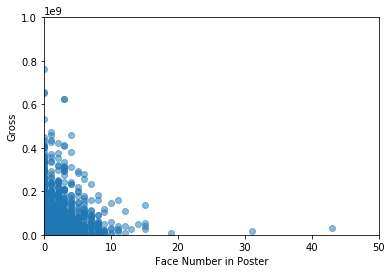

In [357]:
# Gross vs. Face Number in Poster

x_axis = movies_dataframe['facenumber_in_poster']

plt.ylabel('Gross')
plt.xlabel('Face Number in Poster')

plt.ylim([0, 1000000000])           #Gross limit of $1B
plt.xlim([0, 50])                   #Faces in poster limit of 50
plt.scatter(x_axis, y_axis, alpha=0.5)
plt.show()

In [366]:
# Function to convert color values to binary values
def color_to_numeric(x):
    if x == 'Color':
        return 1;
    else:
        return 0;
    
# Creates a new feature named ColorLabel using converted values
movies_dataframe['ColorLabel'] = movies_dataframe['color'].apply(color_to_numeric)
movies_dataframe.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,ColorLabel
0,Color,35,91,32,130512915,60884,3244,2,85,English,USA,PG,45000000,1994,4.8,1.33,0,1
1,Color,228,86,17,17683670,47227,1520,0,323,English,USA,PG-13,5000000,2011,5.2,1.33,0,1
2,Color,149,91,17,41867960,65512,3023,0,478,English,USA,R,20000000,2001,5.5,1.33,0,1
3,Black and White,360,81,19,140530114,186786,399,0,3400,English,USA,R,60000,1999,6.4,1.33,0,0
4,Color,124,90,63,217350219,260939,52970,0,244,English,USA,G,28000000,1992,8.0,1.33,0,1


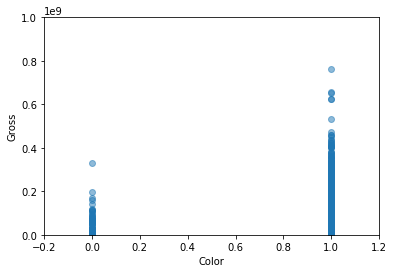

In [367]:
# Gross vs. Color

x_axis = movies_dataframe['ColorLabel']

plt.ylabel('Gross')
plt.xlabel('Color')

plt.ylim([0, 1000000000])           # Gross limit of $1B
plt.xlim([-0.2,1.2])                # ColorLabel range -0.2 - 1.2 for clarity with binary values
plt.scatter(x_axis, y_axis, alpha=0.5)
plt.show()

<dl>
    <dt><h3>Facebook Info</h3></dt>
    <dd><em>Movie Facebook Likes, Cast Total Facebook Likes, Director Facebook Likes</em></dd>
</dl>

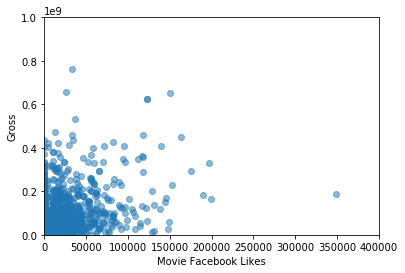

In [365]:
# Gross vs. Movie Facebook Likes

x_axis = movies_dataframe['movie_facebook_likes']

plt.ylabel('Gross')
plt.xlabel('Movie Facebook Likes')

plt.ylim([0, 1000000000])           #Gross limit of $1B
plt.xlim([0, 400000])               #Movie Facebook Like limit of 400,000
plt.scatter(x_axis, y_axis, alpha=0.5)
plt.show()

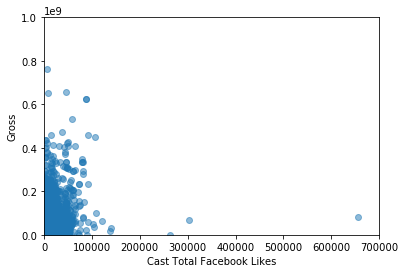

In [286]:
# Gross vs. Cast Total Facebook Likes

x_axis = movies_dataframe['cast_total_facebook_likes']

plt.ylabel('Gross')
plt.xlabel('Cast Total Facebook Likes')

plt.ylim([0, 1000000000])           #Gross limit of $1B
plt.xlim([0, 700000])               #Cast Facebook Like limit of 700,000
plt.scatter(x_axis, y_axis, alpha=0.5)
plt.show()

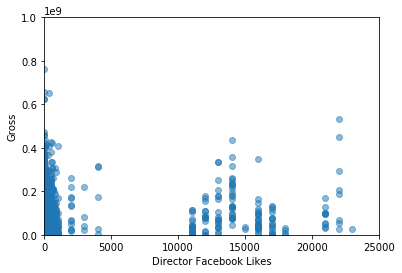

In [287]:
# Gross vs. Director Facebook Likes

x_axis = movies_dataframe['director_facebook_likes']

plt.ylabel('Gross')
plt.xlabel('Director Facebook Likes')

plt.ylim([0, 1000000000])           #Gross limit of $1B
plt.xlim([0, 25000])                #Director Facebook Likes limit of 25000 (no love for the directors)
plt.scatter(x_axis, y_axis, alpha=0.5)
plt.show()

In [292]:
feature_scaled = movies_dataframe[['imdb_score', 'budget', 'duration', 'title_year', 'num_voted_users', 'facenumber_in_poster']]
feature_scaled = feature_scaled.apply(lambda x: ((x - x.min()) / (x.max() - x.min())))

feature_scaled.head()

,imdb_score,budget,duration,title_year,num_voted_users,facenumber_in_poster
0,0.415584,0.149999,0.184300,0.747126,0.036019,0.046512
1,0.467532,0.016666,0.167235,0.942529,0.027936,0.000000
2,0.506494,0.066666,0.184300,0.827586,0.038757,0.000000
3,0.623377,0.000199,0.150171,0.804598,0.110528,0.000000
4,0.831169,0.093333,0.180887,0.724138,0.154412,0.000000
